In [1]:
import moleculegraph
from moleculegraph.molecule_utils import *
import numpy as np
import toml
import unittest


![](../latex/mdma.png?raw=true)


[[0. 1. 2. 3. 4.]]
[[0. 1. 2. 2. 3.]
 [1. 0. 1. 1. 2.]
 [2. 1. 0. 2. 3.]
 [2. 1. 2. 0. 1.]
 [3. 2. 3. 1. 0.]]
bond_list [[0 1]
 [1 3]
 [3 4]
 [1 2]]


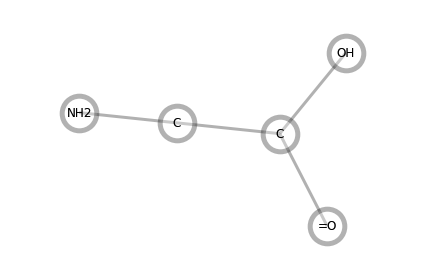

['[=O][C][OH]' '[C][C][OH]' '[=O][C][C]' '[C][C][NH2]']
['[NH2][C][C][OH]' '[=O][C][C][NH2]']


In [2]:
gly = "[OH][C][b1][=O][C][NH2]" 

molecule = moleculegraph.molecule(gly)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( "bond_list", molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)

In [3]:
mol = split_molstring(gly)
"""array representation of the molecule i.e. all keys/words/whatever in a list"""

syntactic_elements = get_syntax_from_numbers(mol)

f = syntactic_elements[0].astype(int)  # shows function
"""array with all functions. 
- branches pointing forward f > 0
- rings pointing backward f < 0
- beads without function f = 0
"""
n = syntactic_elements[1].astype(int)  # shows atomnumber

f, n

(array([0, 0, 1, 0, 0, 0]), array([ 0,  1, -1,  2,  3,  4]))

[[0. 1. 2. 3. 4. 5.]]
[[0. 1. 2. 2. 3. 3.]
 [1. 0. 1. 1. 2. 2.]
 [2. 1. 0. 2. 3. 3.]
 [2. 1. 2. 0. 1. 1.]
 [3. 2. 3. 1. 0. 2.]
 [3. 2. 3. 1. 2. 0.]]
[[0 1]
 [1 3]
 [3 5]
 [1 2]
 [3 4]]


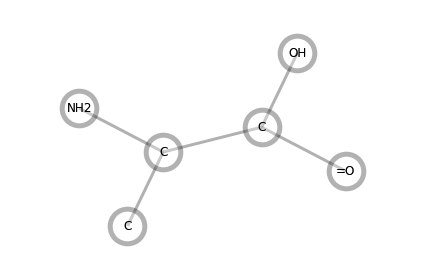

['[=O][C][OH]' '[C][C][OH]' '[=O][C][C]' '[C][C][C]' '[C][C][NH2]'
 '[C][C][NH2]']
['[C][C][C][OH]' '[NH2][C][C][OH]' '[=O][C][C][C]' '[=O][C][C][NH2]']


In [4]:
ala = "[OH][C][b1][=O][C][b1][C][NH2]" 

molecule = moleculegraph.molecule(ala)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)

ala_expected = ['[C][OH]', '[=O][C]', '[C][C]', '[C][C]', '[C][NH2]']

tc = unittest.TestCase()
tc.assertListEqual( sorted(list(molecule.bond_keys)), sorted(list(ala_expected)), "lists not equal" ) 

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]]
[[0. 1. 2. 2. 3. 3. 4. 5. 6. 7. 7.]
 [1. 0. 1. 1. 2. 2. 3. 4. 5. 6. 6.]
 [2. 1. 0. 2. 3. 3. 4. 5. 6. 7. 7.]
 [2. 1. 2. 0. 1. 1. 2. 3. 4. 5. 5.]
 [3. 2. 3. 1. 0. 2. 3. 4. 5. 6. 6.]
 [3. 2. 3. 1. 2. 0. 1. 2. 3. 4. 4.]
 [4. 3. 4. 2. 3. 1. 0. 1. 2. 3. 3.]
 [5. 4. 5. 3. 4. 2. 1. 0. 1. 2. 2.]
 [6. 5. 6. 4. 5. 3. 2. 1. 0. 1. 1.]
 [7. 6. 7. 5. 6. 4. 3. 2. 1. 0. 2.]
 [7. 6. 7. 5. 6. 4. 3. 2. 1. 2. 0.]]
[[ 0  1]
 [ 1  3]
 [ 3  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8 10]
 [ 1  2]
 [ 3  4]
 [ 8  9]]


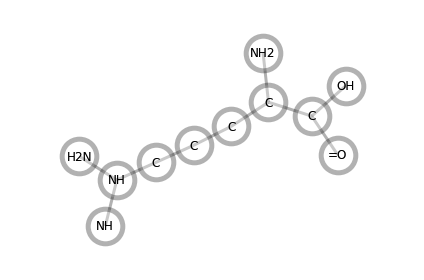

['[=O][C][OH]' '[C][C][OH]' '[=O][C][C]' '[C][C][NH2]' '[C][C][C]'
 '[C][C][NH2]' '[C][C][C]' '[C][C][C]' '[C][C][NH]' '[C][NH][NH]'
 '[C][NH][H2N]' '[H2N][NH][NH]']
['[NH2][C][C][OH]' '[C][C][C][OH]' '[=O][C][C][NH2]' '[=O][C][C][C]'
 '[C][C][C][C]' '[C][C][C][NH2]' '[C][C][C][C]' '[C][C][C][NH]'
 '[C][C][NH][NH]' '[C][C][NH][H2N]']


In [5]:
arg = "[OH][C][b1][=O][C][b1][NH2][C][C][C][NH][b1][NH][H2N]" 

molecule = moleculegraph.molecule(arg)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)

arg_expected = ['[C][OH]', '[=O][C]', '[C][C]', '[C][NH2]', '[C][C]', '[C][C]',
       '[C][C]', '[C][NH]', '[NH][NH]', '[H2N][NH]']

tc = unittest.TestCase()
tc.assertListEqual( sorted(list(molecule.bond_keys)), sorted(list(arg_expected)), "lists not equal" ) 

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]]
[[0. 1. 2. 2. 3. 3. 4. 5. 6. 7. 6. 5.]
 [1. 0. 1. 1. 2. 2. 3. 4. 5. 6. 5. 4.]
 [2. 1. 0. 2. 3. 3. 4. 5. 6. 7. 6. 5.]
 [2. 1. 2. 0. 1. 1. 2. 3. 4. 5. 4. 3.]
 [3. 2. 3. 1. 0. 2. 3. 4. 5. 6. 5. 4.]
 [3. 2. 3. 1. 2. 0. 1. 2. 3. 4. 3. 2.]
 [4. 3. 4. 2. 3. 1. 0. 1. 2. 3. 2. 1.]
 [5. 4. 5. 3. 4. 2. 1. 0. 1. 2. 3. 2.]
 [6. 5. 6. 4. 5. 3. 2. 1. 0. 1. 2. 3.]
 [7. 6. 7. 5. 6. 4. 3. 2. 1. 0. 1. 2.]
 [6. 5. 6. 4. 5. 3. 2. 3. 2. 1. 0. 1.]
 [5. 4. 5. 3. 4. 2. 1. 2. 3. 2. 1. 0.]]
[[ 0  1]
 [ 1  3]
 [ 3  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]
 [10 11]
 [ 1  2]
 [ 3  4]
 [ 6 11]]


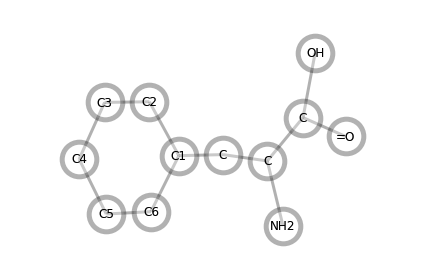

['[=O][C][OH]' '[C][C][OH]' '[=O][C][C]' '[C][C][NH2]' '[C][C][C]'
 '[C][C][NH2]' '[C1][C][C]' '[C2][C1][C]' '[C6][C1][C]' '[C1][C2][C3]'
 '[C2][C1][C6]' '[C1][C6][C5]' '[C2][C3][C4]' '[C3][C4][C5]'
 '[C4][C5][C6]']
['[NH2][C][C][OH]' '[C][C][C][OH]' '[=O][C][C][NH2]' '[=O][C][C][C]'
 '[C1][C][C][C]' '[C1][C][C][NH2]' '[C2][C1][C][C]' '[C6][C1][C][C]'
 '[C3][C2][C1][C]' '[C5][C6][C1][C]' '[C1][C2][C3][C4]' '[C3][C2][C1][C6]'
 '[C2][C1][C6][C5]' '[C1][C6][C5][C4]' '[C2][C3][C4][C5]'
 '[C3][C4][C5][C6]']


In [6]:
phe = "[OH][C][b1][=O][C][b1][NH2][C][C1][C2][C3][C4][C5][C6][r6]" 

molecule = moleculegraph.molecule(phe)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)

phe_expected = ['[C][OH]', '[=O][C]', '[C][C]', '[C][NH2]', '[C][C]', '[C1][C]',
       '[C1][C2]', '[C1][C6]', '[C2][C3]', '[C3][C4]', '[C4][C5]',
       '[C5][C6]']
tc = unittest.TestCase()
tc.assertListEqual( sorted(list(molecule.bond_keys)), sorted(list(phe_expected)), "lists not equal" ) 

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]]
[[0. 1. 2. 2. 3. 3. 4. 5. 6. 7. 8. 6. 5.]
 [1. 0. 1. 1. 2. 2. 3. 4. 5. 6. 7. 5. 4.]
 [2. 1. 0. 2. 3. 3. 4. 5. 6. 7. 8. 6. 5.]
 [2. 1. 2. 0. 1. 1. 2. 3. 4. 5. 6. 4. 3.]
 [3. 2. 3. 1. 0. 2. 3. 4. 5. 6. 7. 5. 4.]
 [3. 2. 3. 1. 2. 0. 1. 2. 3. 4. 5. 3. 2.]
 [4. 3. 4. 2. 3. 1. 0. 1. 2. 3. 4. 2. 1.]
 [5. 4. 5. 3. 4. 2. 1. 0. 1. 2. 3. 3. 2.]
 [6. 5. 6. 4. 5. 3. 2. 1. 0. 1. 2. 2. 3.]
 [7. 6. 7. 5. 6. 4. 3. 2. 1. 0. 1. 1. 2.]
 [8. 7. 8. 6. 7. 5. 4. 3. 2. 1. 0. 2. 3.]
 [6. 5. 6. 4. 5. 3. 2. 3. 2. 1. 2. 0. 1.]
 [5. 4. 5. 3. 4. 2. 1. 2. 3. 2. 3. 1. 0.]]
[[ 0  1]
 [ 1  3]
 [ 3  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 11]
 [11 12]
 [ 1  2]
 [ 3  4]
 [ 9 10]
 [ 6 12]]


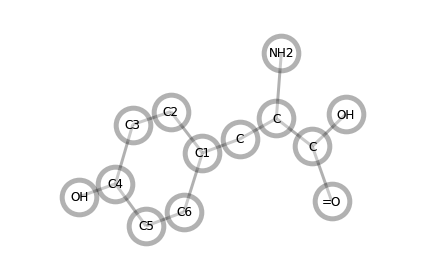

['[=O][C][OH]' '[C][C][OH]' '[=O][C][C]' '[C][C][NH2]' '[C][C][C]'
 '[C][C][NH2]' '[C1][C][C]' '[C2][C1][C]' '[C6][C1][C]' '[C1][C2][C3]'
 '[C2][C1][C6]' '[C1][C6][C5]' '[C2][C3][C4]' '[C3][C4][OH]'
 '[C3][C4][C5]' '[C5][C4][OH]' '[C4][C5][C6]']
['[NH2][C][C][OH]' '[C][C][C][OH]' '[=O][C][C][NH2]' '[=O][C][C][C]'
 '[C1][C][C][C]' '[C1][C][C][NH2]' '[C2][C1][C][C]' '[C6][C1][C][C]'
 '[C3][C2][C1][C]' '[C5][C6][C1][C]' '[C1][C2][C3][C4]' '[C3][C2][C1][C6]'
 '[C2][C1][C6][C5]' '[C1][C6][C5][C4]' '[C2][C3][C4][OH]'
 '[C2][C3][C4][C5]' '[C3][C4][C5][C6]' '[C6][C5][C4][OH]']


In [7]:
tyr = "[OH][C][b1][=O][C][b1][NH2][C][C1][C2][C3][C4][b1][OH][C5][C6][r6]" 

molecule = moleculegraph.molecule(tyr)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)

tyr_expected = ['[C][OH]', '[=O][C]', '[C][C]', '[C][NH2]', '[C][C]', '[C1][C]',
       '[C1][C2]', '[C1][C6]', '[C2][C3]', '[C3][C4]', '[C4][OH]',
       '[C4][C5]', '[C5][C6]']
tc = unittest.TestCase()
tc.assertListEqual( sorted(list(molecule.bond_keys)), sorted(list(tyr_expected)), "lists not equal" ) 

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]]
[[0. 1. 2. 2. 3. 3. 4. 5. 6. 7. 8. 7. 6. 6. 5.]
 [1. 0. 1. 1. 2. 2. 3. 4. 5. 6. 7. 6. 5. 5. 4.]
 [2. 1. 0. 2. 3. 3. 4. 5. 6. 7. 8. 7. 6. 6. 5.]
 [2. 1. 2. 0. 1. 1. 2. 3. 4. 5. 6. 5. 4. 4. 3.]
 [3. 2. 3. 1. 0. 2. 3. 4. 5. 6. 7. 6. 5. 5. 4.]
 [3. 2. 3. 1. 2. 0. 1. 2. 3. 4. 5. 4. 3. 3. 2.]
 [4. 3. 4. 2. 3. 1. 0. 1. 2. 3. 4. 3. 2. 2. 1.]
 [5. 4. 5. 3. 4. 2. 1. 0. 1. 2. 3. 2. 1. 2. 2.]
 [6. 5. 6. 4. 5. 3. 2. 1. 0. 1. 2. 3. 2. 1. 2.]
 [7. 6. 7. 5. 6. 4. 3. 2. 1. 0. 1. 2. 3. 2. 3.]
 [8. 7. 8. 6. 7. 5. 4. 3. 2. 1. 0. 1. 2. 3. 4.]
 [7. 6. 7. 5. 6. 4. 3. 2. 3. 2. 1. 0. 1. 4. 4.]
 [6. 5. 6. 4. 5. 3. 2. 1. 2. 3. 2. 1. 0. 3. 3.]
 [6. 5. 6. 4. 5. 3. 2. 2. 1. 2. 3. 4. 3. 0. 1.]
 [5. 4. 5. 3. 4. 2. 1. 2. 2. 3. 4. 4. 3. 1. 0.]]
[[ 0  1]
 [ 1  3]
 [ 3  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8 13]
 [13 14]
 [ 1  2]
 [ 3  4]
 [ 8  9]
 [ 9 10]
 [10 11]
 [11 12]
 [ 7 12]
 [ 6 14]]


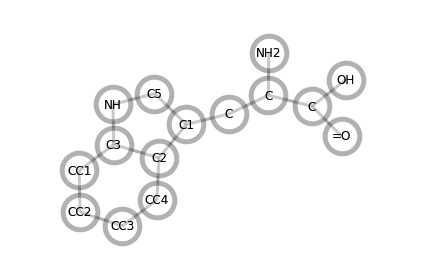

['[=O][C][OH]' '[C][C][OH]' '[=O][C][C]' '[C][C][NH2]' '[C][C][C]'
 '[C][C][NH2]' '[C1][C][C]' '[C2][C1][C]' '[C5][C1][C]' '[C1][C2][C3]'
 '[C1][C2][CC4]' '[C2][C1][C5]' '[C1][C5][NH]' '[C2][C3][CC1]'
 '[C3][C2][CC4]' '[C2][C3][NH]' '[C2][CC4][CC3]' '[C3][CC1][CC2]'
 '[CC1][C3][NH]' '[C3][NH][C5]' '[CC1][CC2][CC3]' '[CC2][CC3][CC4]']
['[NH2][C][C][OH]' '[C][C][C][OH]' '[=O][C][C][NH2]' '[=O][C][C][C]'
 '[C1][C][C][C]' '[C1][C][C][NH2]' '[C2][C1][C][C]' '[C5][C1][C][C]'
 '[C3][C2][C1][C]' '[C][C1][C2][CC4]' '[C][C1][C5][NH]'
 '[C1][C2][C3][CC1]' '[C1][C2][C3][NH]' '[C3][C2][C1][C5]'
 '[C1][C2][CC4][CC3]' '[C5][C1][C2][CC4]' '[C2][C1][C5][NH]'
 '[C1][C5][NH][C3]' '[C2][C3][CC1][CC2]' '[CC1][C3][C2][CC4]'
 '[C3][C2][CC4][CC3]' '[CC4][C2][C3][NH]' '[C2][C3][NH][C5]'
 '[C2][CC4][CC3][CC2]' '[C3][CC1][CC2][CC3]' '[CC2][CC1][C3][NH]'
 '[C5][NH][C3][CC1]' '[CC1][CC2][CC3][CC4]']
['[C][OH]' '[C][C]' '[C][C]' '[C1][C]' '[C1][C2]' '[C2][C3]' '[C3][NH]'
 '[C5][NH]' '[=O][C]' '[C][NH2]' '[C3][CC1]'

In [8]:
trp = "[OH][C][b1][=O][C][b1][NH2][C][C1][C2][C3][b4][CC1][CC2][CC3][CC4][r6][NH][C5][r5]" 

molecule = moleculegraph.molecule(trp)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)
print(molecule.bond_keys)

trp_expected = ['[C][OH]', '[=O][C]', '[C][C]', '[C][NH2]', '[C][C]', '[C1][C]',
       '[C1][C2]', '[C1][C5]', '[C2][C3]', '[C2][CC4]', '[C3][CC1]',
       '[C3][NH]', '[CC1][CC2]', '[CC2][CC3]', '[CC3][CC4]', '[C5][NH]']
tc = unittest.TestCase()
tc.assertListEqual( sorted( list(molecule.bond_keys) ), sorted( list(trp_expected) ), "lists not equal" ) 

[[0. 1. 2. 3. 4. 5. 6.]]
[[0. 1. 1. 1. 1. 2. 3.]
 [1. 0. 2. 2. 2. 3. 4.]
 [1. 2. 0. 2. 2. 3. 4.]
 [1. 2. 2. 0. 2. 3. 4.]
 [1. 2. 2. 2. 0. 1. 2.]
 [2. 3. 3. 3. 1. 0. 1.]
 [3. 4. 4. 4. 2. 1. 0.]]
[[0 4]
 [4 5]
 [5 6]
 [0 1]
 [0 2]
 [0 3]]


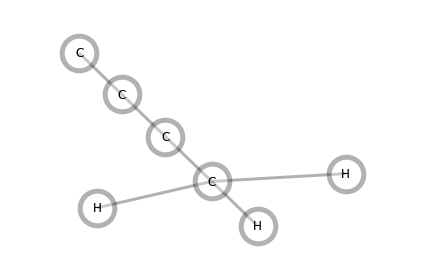

['[H][C][H]' '[H][C][H]' '[C][C][H]' '[H][C][H]' '[C][C][H]' '[C][C][H]'
 '[C][C][C]' '[C][C][C]']
['[C][C][C][H]' '[C][C][C][H]' '[C][C][C][H]' '[C][C][C][C]']
['[C][C]' '[C][C]' '[C][C]' '[C][H]' '[C][H]' '[C][H]']


In [9]:
trp = "[C][b1][H][b1][H][b1][H][C][C][C]" 

molecule = moleculegraph.molecule(trp)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)
print(molecule.bond_keys)


end of branch outside molecule. ignore.
[[0. 1. 2. 3.]]
[[0. 1. 1. 1.]
 [1. 0. 2. 2.]
 [1. 2. 0. 2.]
 [1. 2. 2. 0.]]
[[0 3]
 [0 1]
 [0 2]]


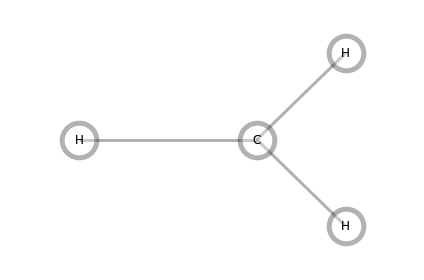

['[H][C][H]' '[H][C][H]' '[H][C][H]']
[]
['[C][H]' '[C][H]' '[C][H]']


In [10]:
trp = "[C][b1][H][b1][H][b1][H]" 

molecule = moleculegraph.molecule(trp)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)
print(molecule.bond_keys)

[[0. 1. 2. 3. 4. 5.]]
[[0. 1. 2. 2. 3. 3.]
 [1. 0. 1. 1. 2. 2.]
 [2. 1. 0. 2. 3. 3.]
 [2. 1. 2. 0. 1. 1.]
 [3. 2. 3. 1. 0. 2.]
 [3. 2. 3. 1. 2. 0.]]
[[0 1]
 [1 3]
 [3 5]
 [1 2]
 [3 4]]


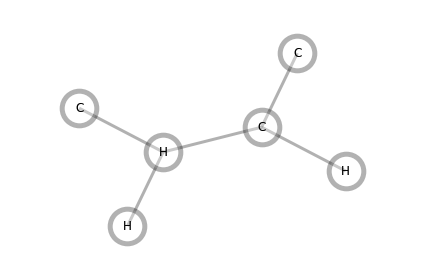

['[C][C][H]' '[C][C][H]' '[H][C][H]' '[C][H][H]' '[C][H][C]' '[C][H][H]']
['[C][C][H][H]' '[C][C][H][C]' '[H][C][H][H]' '[C][H][C][H]']
['[C][C]' '[C][H]' '[C][H]' '[C][H]' '[H][H]']


In [11]:
trp = "[C][C][b1][H][H][b1][H][C]" 

molecule = moleculegraph.molecule(trp)
print(np.array([molecule.atom_numbers.astype(float)]) )
print( molecule.distance_matrix )
#print( molecule.bond_matrix )
print( molecule.bond_list )
molecule.visualize()
print(molecule.angle_keys)
print(molecule.torsion_keys)
print(molecule.bond_keys)


In [12]:
molecule = moleculegraph.molecule(trp)